<a href="https://colab.research.google.com/github/Rafsan7238/BracU_Thesis_P2/blob/main/Pre_Thesis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Application of Deep Convolutional Neural Network in Breast Cancer Prediction Using Digital Mammograms**

**Authors:** Rafsan Al Mamun, Md. Al Imran Sefat, Gazi Abu Rafin, Adnan

**Project GitHub Link:** [https://github.com/Rafsan7238/BracU_Thesis_P2](https://github.com/Rafsan7238/BracU_Thesis_P2)



---



***Abstract:*** *Cancer, a diagnosis that is so dreaded and scary, that its fear alone can strike even the
strongest of souls. The disease is often thought of as untreatable and unbearably painful, with
usually, no cure available. Among all the cancers, breast cancer is the second most deadliest ,
especially among women. What decides the patients’ fate is the early diagnosis of the cancer,
facilitating subsequent clinical management. Mammography plays a vital role in the
screening of breast cancers as it can detect any breast masses or calcifications early. However,
the extremely dense breast tissues pose difficulty in the detection of cancer mass, thus,
encouraging the use of machine learning (ML) techniques and artificial neural networks
(ANN) to assist radiologists in faster cancer diagnosis. This paper explores the MIAS
database, containing 332 digital mammograms from women, which were augmented and
preprocessed, and fed into different convolutional neural network (CNN) models, with the
aim of differentiating healthy tissues from cancerous ones with high accuracy. The paper,
along with a new proposed CNN model for better identification of breast cancer, focuses on
the significance of computer-aided detection (CAD) models overall in the early diagnosis of
breast cancer. While a diagnosis of breast cancer may still leave patients dreaded, we believe
our research can be a symbol of hope for all.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Collection and Preprocessing**

In [ ]:
pip install -U albumentations

     |████████████████████████████████| 98 kB 4.6 MB/s 
     |████████████████████████████████| 37.1 MB 47 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os
import albumentations as A

def load_data():
  """
    Load image data from directory '/content/drive/MyDrive/Thesis/Dataset'.

    Load each image file from the subdirectories of Dataset, turn it into B/W and augment it. 
    After each augmentation append the images into the images list, and their corresponding
    labels in the labels list. 

    Return tuple `(images, labels)`. `images` should be a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions 224 x 224 x 3. `labels` should
    be a list of labels (0 for healthy or 1 for cancer), representing the categories for each of the
    corresponding `images`.
    """

  images = []
  labels = []

  # Loop through the healthy dataset
  directory_path = "/content/drive/MyDrive/Thesis/Dataset/Healthy"
  os.chdir(directory_path)
  count = 1

  for file in os.listdir():
    if file.endswith(".jpg"):

      print(f"Working with {count}  healthy images out of 272")
      count += 1

      file_path = os.path.join(directory_path, file)
      img = cv2.imread(file_path)
      
      #TODO

      # 1. Resize to 224*224      
      img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
      
      images.append(img)
      labels.append(0)

      # 2. Turn to LAB for CLAHE
      image_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
      lab_planes = cv2.split(image_lab)
      
      # 3. CLAHE
      # The declaration of CLAHE 
      # Apply CLAHE on the luminescence channel
      # clipLimit -> Threshold for contrast limiting
      clahe = cv2.createCLAHE(clipLimit = 5)
      lab_planes[0] = clahe.apply(lab_planes[0])

      # Merge the LAB planes into an LAB image, and convert it back to RGB
      image_lab = cv2.merge(lab_planes)
      final_img = cv2.cvtColor(image_lab, cv2.COLOR_LAB2BGR)

      images.append(final_img)
      labels.append(0)

      # 4. augmentation and append


      # 4.a) rotate 10  
      transform = A.Compose([
        A.Rotate(10)
      ])
      transformed = transform(image = final_img)
      transformed_image = transformed["image"]

      images.append(transformed_image)
      labels.append(0)

      # 4.b) rotate 20 
      transform = A.Compose([
        A.Rotate(20)
      ])
      transformed = transform(image = final_img)
      transformed_image = transformed["image"]

      images.append(transformed_image)
      labels.append(0)

      # 4.c) horizontal flip 
      transform = A.Compose([
        A.HorizontalFlip(p=1)
      ])
      transformed = transform(image = final_img)
      transformed_image = transformed["image"]

      images.append(transformed_image)
      labels.append(0)

       # 4.d) vertical flip 
      transform = A.Compose([
        A.VerticalFlip(p=1)
      ])
      transformed = transform(image = final_img)
      transformed_image = transformed["image"]

      images.append(transformed_image)
      labels.append(0)

      # 4.e) random tone curve 
      transform = A.Compose([
        A.RandomToneCurve(always_apply = True)
      ])
      transformed = transform(image = final_img)
      transformed_image = transformed["image"]
      
      images.append(transformed_image)
      labels.append(0)

      # 4.f) GaussNoise 
      transform = A.Compose([
        A.GaussNoise()
      ])
      transformed = transform(image = final_img)
      transformed_image = transformed["image"]
      
      images.append(transformed_image)
      labels.append(0)


      # 4.g) Blur 
      transform = A.Compose([
        A.Blur()
      ])
      transformed = transform(image = final_img)
      transformed_image = transformed["image"]
     
      images.append(transformed_image)
      labels.append(0)

    

  ##### Same for cancer dataset

  # Loop through the cancer dataset
  directory_path = "/content/drive/MyDrive/Thesis/Dataset/Cancer"
  os.chdir(directory_path)
  count = 1

  for file in os.listdir():
    if file.endswith(".jpg"):
     
      print(f"Working with {count} cancer images out of 50")
      count += 1

      file_path = os.path.join(directory_path, file)
      img = cv2.imread(file_path)
      
      #TODO

      # 1. Resize to 224*224      
      img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
     
      images.append(img)
      labels.append(1)

      # 2. Turn to LAB for CLAHE
      image_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
      lab_planes = cv2.split(image_lab)
      
      # 3. CLAHE
      # The declaration of CLAHE 
      # Apply CLAHE on the luminescence channel
      # clipLimit -> Threshold for contrast limiting
      clahe = cv2.createCLAHE(clipLimit = 5)
      lab_planes[0] = clahe.apply(lab_planes[0])

      # Merge the LAB planes into an LAB image, and convert it back to RGB
      image_lab = cv2.merge(lab_planes)
      final_img = cv2.cvtColor(image_lab, cv2.COLOR_LAB2BGR)

      images.append(final_img)
      labels.append(1)

      # 4. augmentation and append


      # 4.a) rotate 10  
      transform = A.Compose([
        A.Rotate(10)
      ])
      transformed = transform(image = final_img)
      transformed_image = transformed["image"]
      
      images.append(transformed_image)
      labels.append(1)

      # 4.b) rotate 20 
      transform = A.Compose([
        A.Rotate(20)
      ])
      transformed = transform(image = final_img)
      transformed_image = transformed["image"]
      
      images.append(transformed_image)
      labels.append(1)

      # 4.c) horizontal flip 
      transform = A.Compose([
        A.HorizontalFlip(p=1)
      ])
      transformed = transform(image = final_img)
      transformed_image = transformed["image"]
      
      images.append(transformed_image)
      labels.append(1)

       # 4.d) vertical flip 
      transform = A.Compose([
        A.VerticalFlip(p=1)
      ])
      transformed = transform(image = final_img)
      transformed_image = transformed["image"]
     
      images.append(transformed_image)
      labels.append(1)

      # 4.e) random tone curve 
      transform = A.Compose([
        A.RandomToneCurve(always_apply = True)
      ])
      transformed = transform(image = final_img)
      transformed_image = transformed["image"]
      
      images.append(transformed_image)
      labels.append(1)

      # 4.f) GaussNoise 
      transform = A.Compose([
        A.GaussNoise()
      ])
      transformed = transform(image = final_img)
      transformed_image = transformed["image"]
     
      images.append(transformed_image)
      labels.append(1)


      # 4.g) Blur 
      transform = A.Compose([
        A.Blur()
      ])
      transformed = transform(image = final_img)
      transformed_image = transformed["image"]
      
      images.append(transformed_image)
      labels.append(1)

  # Return a tuple of (images, labels)

  return (images, labels)

## **Image Visualisation**

In [ ]:
images, labels = load_data()

Working with 1  healthy images out of 272
Working with 2  healthy images out of 272
Working with 3  healthy images out of 272
Working with 4  healthy images out of 272
Working with 5  healthy images out of 272
Working with 6  healthy images out of 272
Working with 7  healthy images out of 272
Working with 8  healthy images out of 272
Working with 9  healthy images out of 272
Working with 10  healthy images out of 272
Working with 11  healthy images out of 272
Working with 12  healthy images out of 272
Working with 13  healthy images out of 272
Working with 14  healthy images out of 272
Working with 15  healthy images out of 272
Working with 16  healthy images out of 272
Working with 17  healthy images out of 272
Working with 18  healthy images out of 272
Working with 19  healthy images out of 272
Working with 20  healthy images out of 272
Working with 21  healthy images out of 272
Working with 22  healthy images out of 272
Working with 23  healthy images out of 272
Working with 24  hea

In [ ]:
print(len(images))
print(len(labels))

2898
2898


## **Necessary Imports for Models**

In [ ]:
import tensorflow as tf

from tensorflow.keras.applications import ResNet50, EfficientNetB0, MobileNetV3Small, VGG19
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D
from tensorflow.keras.metrics import Accuracy

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc

import numpy as np
import matplotlib.pyplot as plt

## **Transfer Learning Models**

### **Pre-trained ResNet50 Model**

In [ ]:
def get_resnet_pretrained():
  base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

  for layer in base_model.layers:
    layer.trainable = False


  x = Flatten()(base_model.output)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(1, activation='sigmoid')(x)

  model = Model(base_model.input, x)

  model.compile(
      optimizer = "adam",
      loss="binary_crossentropy",
      metrics=['accuracy']
  )

  return model

### **Pre-trained MobileNet V3 Small Model**

In [ ]:
def get_mobilenet_pretrained():
  base_model = MobileNetV3Small(input_shape=(224, 224,3), include_top=False, weights="imagenet")

  for layer in base_model.layers:
    layer.trainable = False

  x = Flatten()(base_model.output)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(1, activation='sigmoid')(x)

  model = Model(base_model.input, x)

  model.compile(
      optimizer = "adam",
      loss="binary_crossentropy",
      metrics=["accuracy"]
  )

  return model

### **Pre-trained VGG19 Model**

In [ ]:
def get_vgg_pretrained():
  base_model = VGG19(input_shape=(224, 224,3), include_top=False, weights="imagenet")

  for layer in base_model.layers:
    layer.trainable = False

  x = Flatten()(base_model.output)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(1, activation='sigmoid')(x)

  model = Model(base_model.input, x)

  model.compile(
      optimizer = "adam",
      loss="binary_crossentropy",
      metrics=["accuracy"]
  )

  return model

## **Custom-Made CNN Model**

### **Model Design**

In [ ]:
def get_custom_model():

  model = Sequential([

                      Conv2D(64, (4,4), strides=(3,3) ,input_shape=(224,224,3), activation='relu'),
                      AveragePooling2D(pool_size=(3,3)),

                      Conv2D(64, (3,3), activation='relu'),
                      MaxPooling2D(pool_size=(2,2)),

                      Conv2D(128, (3,3), activation='relu'),
                      MaxPooling2D(pool_size=(2,2)),

                      Dense(256, activation='relu'),
                      Dropout(0.2),

                      Dense(512, activation='relu'),
                      Dropout(0.2),

                      Flatten(),

                      Dense(1, activation='sigmoid')
  ])

  model.compile(
      optimizer = "adam",
      loss="binary_crossentropy",
      metrics=["accuracy"]
  )

  return model

## **Main Method**

**Split the Data into Train and Test Sets**

In [145]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=0.2, shuffle=True)

### **Pre-trained ResNet50**

**Train and Test**

In [148]:
pretrained_resnet_model = get_resnet_pretrained()
pretrain_resnet_history = pretrained_resnet_model.fit(x_train, y_train, validation_split=0.1, epochs=8, steps_per_epoch=100)
pretrained_resnet_model.evaluate(x_test, y_test, verbose=2)
pretrained_resnet_y_pred = pretrained_resnet_model.predict(x_test).ravel()

# For precision, recall, F1
pretrained_resnet_y_class = np.where(pretrained_resnet_y_pred<0.5, 0, 1)

resnet_precision = precision_score(y_test, pretrained_resnet_y_class)
print(f"Precision: {round(resnet_precision,4)}")

resnet_recall = recall_score(y_test, pretrained_resnet_y_class)
print(f"Recall: {round(resnet_recall,4)}")

resnet_f1 = f1_score(y_test, pretrained_resnet_y_class)
print(f"F1: {round(resnet_f1,4)}")

Epoch 1/8
100/100 [==============================] - 12s 97ms/step - loss: 7.1465 - accuracy: 0.7771 - val_loss: 0.3052 - val_accuracy: 0.9052
Epoch 2/8
100/100 [==============================] - 8s 85ms/step - loss: 0.3183 - accuracy: 0.8921 - val_loss: 0.2625 - val_accuracy: 0.9181
Epoch 3/8
100/100 [==============================] - 9s 86ms/step - loss: 0.2304 - accuracy: 0.9180 - val_loss: 0.1990 - val_accuracy: 0.9310
Epoch 4/8
100/100 [==============================] - 9s 85ms/step - loss: 0.1972 - accuracy: 0.9233 - val_loss: 0.2396 - val_accuracy: 0.9181
Epoch 5/8
100/100 [==============================] - 8s 85ms/step - loss: 0.1784 - accuracy: 0.9324 - val_loss: 0.3184 - val_accuracy: 0.9181
Epoch 6/8
100/100 [==============================] - 8s 83ms/step - loss: 0.1655 - accuracy: 0.9406 - val_loss: 0.3167 - val_accuracy: 0.9138
Epoch 7/8
100/100 [==============================] - 8s 83ms/step - loss: 0.1682 - accuracy: 0.9444 - val_loss: 0.3695 - val_accuracy: 0.9138
Epoch

**Evaluation**

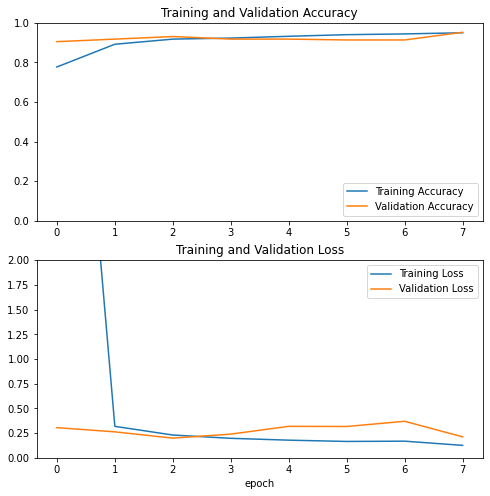

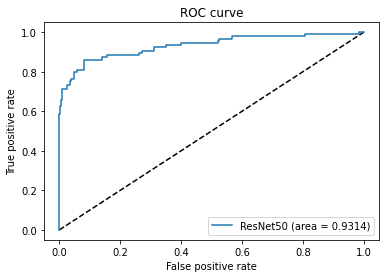

In [149]:
acc = pretrain_resnet_history.history['accuracy']
val_acc = pretrain_resnet_history.history['val_accuracy']

loss = pretrain_resnet_history.history['loss']
val_loss = pretrain_resnet_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 2.0])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#roc and auc

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, pretrained_resnet_y_pred)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ResNet50 (area = {:.4f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

### **Pre-trained MobileNet V3 Small**

**Train and Test**

In [ ]:
pretrained_mobilenet_model = get_mobilenet_pretrained()
pretrain_mobilenet_history = pretrained_mobilenet_model.fit(x_train, y_train, validation_split=0.1, epochs=8)
pretrained_mobilenet_model.evaluate(x_test, y_test, verbose=2)
pretrained_mobilenet_y_pred = pretrained_mobilenet_model.predict(x_test).ravel()

# For precision, recall, F1
pretrained_mobilenet_y_class = np.where(pretrained_mobilenet_y_pred<0.5, 0, 1)

mobilenet_precision = precision_score(y_test, pretrained_mobilenet_y_class)
print(f"Precision: {round(mobilenet_precision,4)}")

mobilenet_recall = recall_score(y_test, pretrained_mobilenet_y_class)
print(f"Recall: {round(mobilenet_recall,4)}")

mobilenet_f1 = f1_score(y_test, pretrained_mobilenet_y_class)
print(f"F1: {round(mobilenet_f1,4)}")

6701056/6698480 [==============================] - 0s 0us/step
Epoch 1/8
66/66 [==============================] - 7s 46ms/step - loss: 7.0538 - accuracy: 0.7800 - val_loss: 0.4095 - val_accuracy: 0.8319
Epoch 2/8
66/66 [==============================] - 2s 25ms/step - loss: 0.3183 - accuracy: 0.8749 - val_loss: 0.3027 - val_accuracy: 0.8491
Epoch 3/8
66/66 [==============================] - 2s 24ms/step - loss: 0.2220 - accuracy: 0.9132 - val_loss: 0.1906 - val_accuracy: 0.9397
Epoch 4/8
66/66 [==============================] - 2s 24ms/step - loss: 0.1706 - accuracy: 0.9243 - val_loss: 0.2613 - val_accuracy: 0.9095
Epoch 5/8
66/66 [==============================] - 2s 25ms/step - loss: 0.1155 - accuracy: 0.9521 - val_loss: 0.2164 - val_accuracy: 0.9397
Epoch 6/8
66/66 [==============================] - 2s 24ms/step - loss: 0.1285 - accuracy: 0.9444 - val_loss: 0.2269 - val_accuracy: 0.9483
Epoch 7/8
66/66 [==============================] - 2s 24ms/step - loss: 0.0995 - accuracy: 0.9578

**Evaluation**

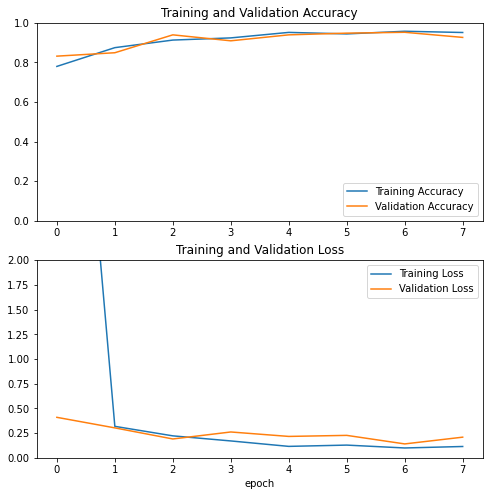

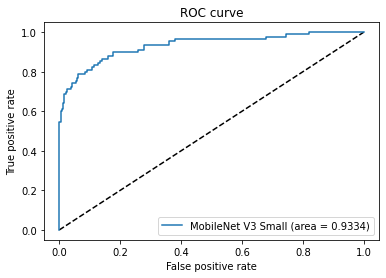

In [ ]:
acc = pretrain_mobilenet_history.history['accuracy']
val_acc = pretrain_mobilenet_history.history['val_accuracy']

loss = pretrain_mobilenet_history.history['loss']
val_loss = pretrain_mobilenet_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 2.0])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#roc and auc

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, pretrained_mobilenet_y_pred)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='MobileNet V3 Small (area = {:.4f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

### **Pre-trained VGG19**

**Train and Test**

In [ ]:
pretrained_vgg_model = get_vgg_pretrained()
pretrain_vgg_history = pretrained_vgg_model.fit(x_train, y_train, validation_split=0.1, epochs=8)
pretrained_vgg_model.evaluate(x_test, y_test, verbose=2)
pretrained_vgg_y_pred = pretrained_vgg_model.predict(x_test).ravel()

# For precision, recall, F1
pretrained_vgg_y_class = np.where(pretrained_vgg_y_pred<0.5, 0, 1)

vgg_precision = precision_score(y_test, pretrained_vgg_y_class)
print(f"Precision: {round(vgg_precision,4)}")

vgg_recall = recall_score(y_test, pretrained_vgg_y_class)
print(f"Recall: {round(vgg_recall,4)}")

vgg_f1 = f1_score(y_test, pretrained_vgg_y_class)
print(f"F1: {round(vgg_f1,4)}")

80142336/80134624 [==============================] - 1s 0us/step
Epoch 1/8
66/66 [==============================] - 35s 375ms/step - loss: 7.0843 - accuracy: 0.7752 - val_loss: 0.3285 - val_accuracy: 0.8793
Epoch 2/8
66/66 [==============================] - 19s 296ms/step - loss: 0.3243 - accuracy: 0.8744 - val_loss: 0.2587 - val_accuracy: 0.8879
Epoch 3/8
66/66 [==============================] - 19s 295ms/step - loss: 0.2456 - accuracy: 0.8907 - val_loss: 0.2140 - val_accuracy: 0.9095
Epoch 4/8
66/66 [==============================] - 20s 296ms/step - loss: 0.1958 - accuracy: 0.9132 - val_loss: 0.2655 - val_accuracy: 0.9052
Epoch 5/8
66/66 [==============================] - 20s 296ms/step - loss: 0.1605 - accuracy: 0.9262 - val_loss: 0.1936 - val_accuracy: 0.9310
Epoch 6/8
66/66 [==============================] - 19s 295ms/step - loss: 0.1438 - accuracy: 0.9406 - val_loss: 0.1695 - val_accuracy: 0.9440
Epoch 7/8
66/66 [==============================] - 20s 296ms/step - loss: 0.1278 - 

**Evaluation**

In [ ]:
acc = pretrain_vgg_history.history['accuracy']
val_acc = pretrain_vgg_history.history['val_accuracy']

loss = pretrain_vgg_history.history['loss']
val_loss = pretrain_vgg_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([7,7],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([7,7],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#roc and auc

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, pretrained_vgg_y_pred)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Pre-trained VGG19 (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### **Custom Model**

**Train and Test**

In [156]:
custom_model = get_custom_model()
custom_history = custom_model.fit(x_train, y_train, validation_split=0.1, epochs=12, steps_per_epoch=100)
custom_model.evaluate(x_test, y_test, verbose=2)
custom_y_pred = custom_model.predict(x_test).ravel()

# For precision, recall, F1
custom_y_class = np.where(custom_y_pred<0.5, 0, 1)

custom_precision = precision_score(y_test, custom_y_class)
print(f"Precision: {round(custom_precision,4)}")

custom_recall = recall_score(y_test, custom_y_class)
print(f"Recall: {round(custom_recall,4)}")

custom_f1 = f1_score(y_test, custom_y_class)
print(f"F1: {round(custom_f1,4)}")

Epoch 1/12
100/100 [==============================] - 2s 12ms/step - loss: 0.6135 - accuracy: 0.8322 - val_loss: 0.4415 - val_accuracy: 0.8362
Epoch 2/12
100/100 [==============================] - 1s 9ms/step - loss: 0.4345 - accuracy: 0.8471 - val_loss: 0.4410 - val_accuracy: 0.8362
Epoch 3/12
100/100 [==============================] - 1s 9ms/step - loss: 0.4189 - accuracy: 0.8447 - val_loss: 0.4002 - val_accuracy: 0.8362
Epoch 4/12
100/100 [==============================] - 1s 9ms/step - loss: 0.4106 - accuracy: 0.8514 - val_loss: 0.3920 - val_accuracy: 0.8362
Epoch 5/12
100/100 [==============================] - 1s 9ms/step - loss: 0.3764 - accuracy: 0.8591 - val_loss: 0.4236 - val_accuracy: 0.8448
Epoch 6/12
100/100 [==============================] - 1s 9ms/step - loss: 0.3481 - accuracy: 0.8624 - val_loss: 0.3337 - val_accuracy: 0.8664
Epoch 7/12
100/100 [==============================] - 1s 9ms/step - loss: 0.2999 - accuracy: 0.8787 - val_loss: 0.3131 - val_accuracy: 0.8836
Epoch

**Evaluation**

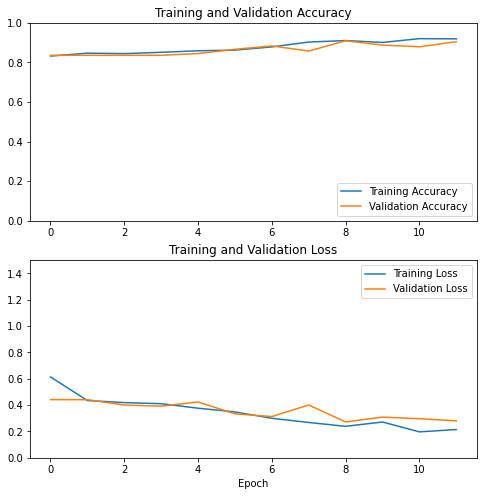

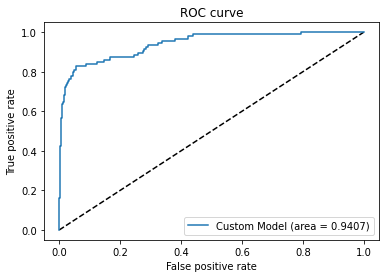

In [157]:
acc = custom_history.history['accuracy']
val_acc = custom_history.history['val_accuracy']

loss = custom_history.history['loss']
val_loss = custom_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.5])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

#roc and auc

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, custom_y_pred)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Custom Model (area = {:.4f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()